# Analiza cen avtomobilov
V analizi podatkov se bom osredotočil na dejavnike, ki vplivajo na ceno avtomobilov in predvsem na kakšen način vplivajo na ceno (eksponentno, linearno, kvadratno...). Avtomobile bomo identificirali z njihovo registrsko številko VIN (ker so bili vsi podatki zajeti istočasno, 2 avtomobila ne moreta imeti iste registrcije). Raziskujemo 3 najbolj prodajane znamke Audi, BMW in Mercedes-Benz.

### Namen analize podatkov
Cilj analize je, da ugotovino in sklepamo o podatkih in cenah avtomobilov glede na znamko, starost, prevožene kilometre itd. 

In [3]:
import pandas as pd
import numpy as np

In [4]:
cars = pd.read_csv("pociscen_cars.csv", index_col="VIN")
cars

,year,znamka,model,state,city,price,miles,accidents,use,owners,MPG_city,MPG_highway,engine,transmission,drive_type,exterior,interior
VIN,,,,,,,,,,,,,,,,,
WDBSK75F93F021261,2003,mercedes-benz,sl,CA,San Diego,9999,91284,0,Personal,4,15,22,5.0L V-8 Gas,Automatic,RWD,Silver,Unknown
WDDHF8JB6EA869273,2014,mercedes-benz,e-class,FL,Tampa,14995,102589,0,Personal,3,21,29,3.5L V-6 Gas,Automatic,AWD,White,Unknown
WDBSK75F13F014465,2003,mercedes-benz,sl,IL,Downers Grove,14888,55988,0,Personal,4,15,22,5.0L V-8 Gas,Automatic,RWD,Black,Unknown
WD4PF0CD3KP053996,2019,mercedes-benz,sprinter-crew-van,TX,Webster,39999,51311,0,Fleet,1,0,0,3.0L V-6 Diesel Turbocharged,Automatic,RWD,Gray,Black
WD3PF1CDXJP626790,2018,mercedes-benz,sprinter-chassis-cab,VA,Fredericksburg,49000,34262,0,Personal,1,0,0,3.0L V-6 Diesel Turbocharged,Automatic,RWD,White,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WAUC8AFC4JN051922,2018,audi,a6,IN,Indianapolis,27500,77775,0,Personal,2,25,34,2.0L Inline-4 Gas Turbocharged,Automatic,FWD,White,Black
WA1B4AFY9L2124495,2020,audi,sq5,TX,McKinney,46999,21868,0,Personal,1,18,23,3.0L V-6 Gas Turbocharged,Automatic,AWD,Gray,Black
WA1EECF39M1051470,2021,audi,q3,MD,Rockville,41998,19943,0,Personal,1,20,28,2.0L Inline-4 Gas Turbocharged,Automatic,AWD,White,Gray


Raziščimo najprej nekaj osnovnih informacij o ceni, ki jih bomo v nadaljevanju uporabljali pri raziskavi cen. Ker smo izbrali podobni cenovni razred, se ne bomo ukvarjali z znamko, saj se avtomobili bolj razlikujejo zaradi modela avtomobila. Spodaj je prikazana razlika med povprečnimi cenami, ki pa se bolj odražajo pri modelu avtomobila.

<AxesSubplot:xlabel='znamka'>

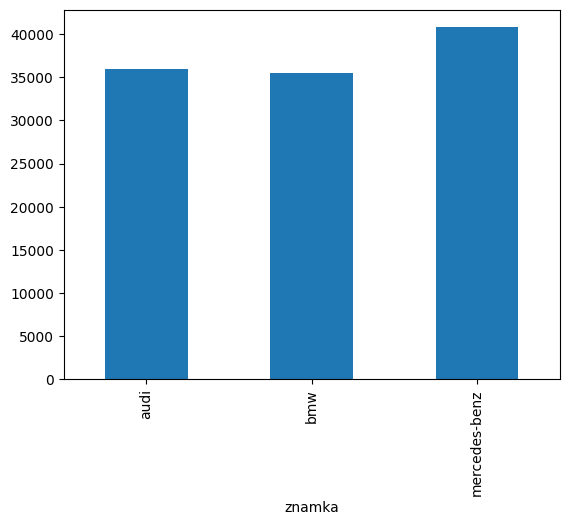

In [5]:
cars.groupby("znamka").price.mean().plot(kind="bar")

Poglejmo najprej odvisnost cene od porabe. Ker imajo električni avtomobili drugačen način izračuna porabe, pogledamo avtomobile, ki imajo manjšo porabo od 40 in večji od 0 (ti niso električni).

<AxesSubplot:xlabel='MPG_city', ylabel='price'>

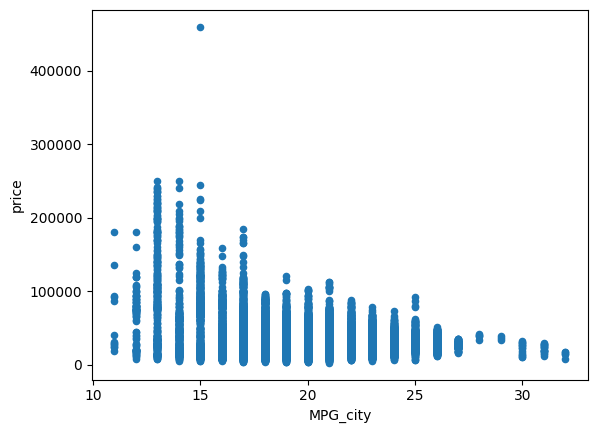

In [6]:
cars[(cars.MPG_city > 0) & (cars.MPG_city < 40)].plot.scatter(x='MPG_city', y='price')

Tudi ta podatek je očitno odvisen tudi od modela. Posvetimo se ocenjevanju modela. Zanima nas, kakšno ima odvisnost cena od modela. 

<AxesSubplot:xlabel='model', ylabel='price'>

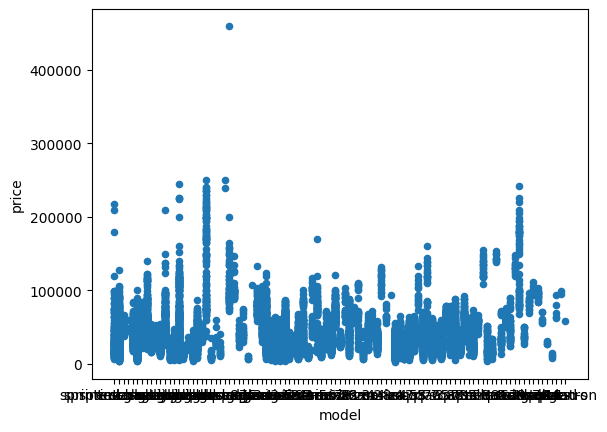

In [7]:
cars.plot.scatter(x='model', y='price')

Sklepamo lahko, da bodo nekateri modeli dražji od drugih ne glede na lastnosti (starost, nesreče...), torej lahko predvidevamo, da imajo neko "začetno vrednost", potem pa se drugi z nekim koeficientom razrezajo po nekem razponu na nekem intervalu. Naša hipoteza je torej, da $f_{kn}(x) = kx + n$, kjer je $f_{kn}$ odvisen od modela.

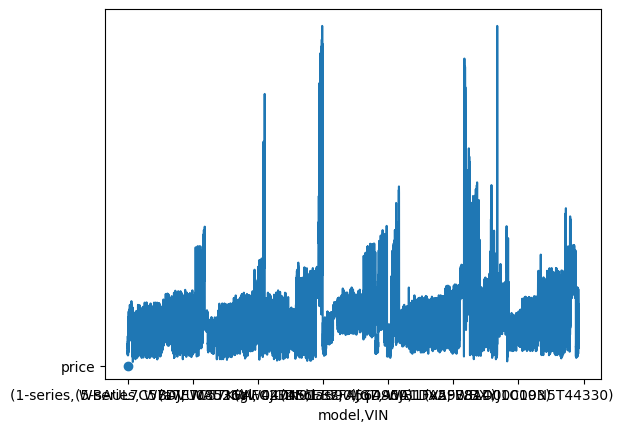

In [8]:
cars_grouped = cars.groupby("model")["price"]
cars_avg = cars_grouped.mean()
cars_std = cars_grouped.std()
filtered_cars = cars_grouped.apply(lambda x: x[~((x > x.mean() + 2 * x.std()) | (x < x.mean() - 2 * x.std()))])
# Na vsak element cars_grouped, ki je DataFrame, apply-amo funkcijo, ki sfiltrira tiste, ki preveč odstopajo od povprečja; bolj kot drugi
filtered_cars.plot().scatter(x="model", y="price")

In [9]:
def min_max_price(model):
    filtered_cars_model = cars_grouped.get_group(model)
    return filtered_cars_model.min(), filtered_cars_model.max()
min_max_price("a6")

(5499, 62382)

Iz zgornjega grafa lahko opazimo, da so podatki gosto razporejeni na svojih intervalih, zato smo očitno odstanili pravo količino podatkov.

Zdaj lahko naredimo novo tabelo, kjer vsaj malo upoštevamo model. Vse cene bomo normalizirali tako, da bomo ceni avtomobila odšteli najmanjšo ceno in nato delili z razponom, ki ga ima specifičen model avtomobila. Potem bomo lahko vsako lastnost rabljenega avtomobila ocenili in tudi tiste lastnosti linearizirali.

In [10]:
def normaliziraj_ceno(cena, model):
    min, max = min_max_price(model)
    k = max - min
    return (cena - min) / k

cars["age"] = cars['year'].apply(lambda x: 2022 - x)
cars["nor_price"] = cars.apply(lambda row: normaliziraj_ceno(row["price"], row["model"]), axis=1)
cars_useful_info = cars[["model", "miles", "accidents", "age", "owners", "nor_price"]]
cars_useful_info


/var/folders/1s/tcdbpyk50fj_5h8_xchrln2r0000gn/T/ipykernel_60340/1148804842.py:4: RuntimeWarning: invalid value encountered in long_scalars
  return (cena - min) / k


,model,miles,accidents,age,owners,nor_price
VIN,,,,,,
WDBSK75F93F021261,sl,91284,0,19,4,0.019095
WDDHF8JB6EA869273,e-class,102589,0,8,3,0.091041
WDBSK75F13F014465,sl,55988,0,19,4,0.042150
WD4PF0CD3KP053996,sprinter-crew-van,51311,0,3,1,0.071566
WD3PF1CDXJP626790,sprinter-chassis-cab,34262,0,4,1,0.290883
...,...,...,...,...,...,...
WAUC8AFC4JN051922,a6,77775,0,4,2,0.386776
WA1B4AFY9L2124495,sq5,21868,0,2,1,0.626456
WA1EECF39M1051470,q3,19943,0,1,1,0.857131


Z normalizirano ceno pogledamo odvisnost od prevoženih kilometrov, nesreč, število nesreč...

Očitno lahko iz spodnjega grafa opazimo, da število nesreč vpliva na ceno avtomobilov, ta odvisnost je očitno linearna. Po 4 nesrečah je prav tako avto že na tako nizki ceni, da lahko predvidevamo, da kasnejše nesreče na ceno več ne vplivajo, saj je ta če takrat približno 4-krat manjša od začetne. Ta funkcija bi se kasneje obnašala bližje funkciji $\frac{1}{x}$.

<AxesSubplot:xlabel='accidents'>

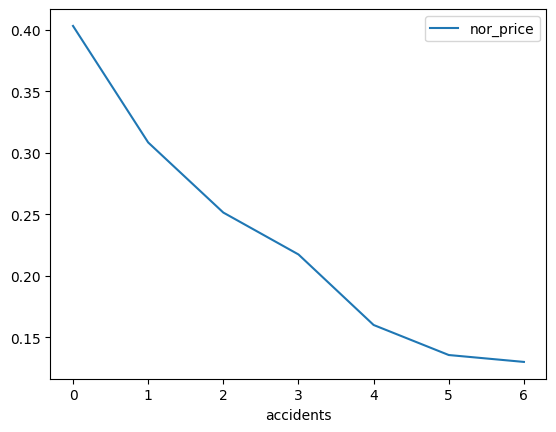

In [11]:
cars_useful_info[["accidents", "nor_price"]].groupby("accidents").mean().plot()

## Odvisnost cene avtomobila od starosti

Spodaj je graf odvisnosti cene od starosti. Kot bi pričakovali, se cena s starostjo niža, obnaša se eksponentno (v prvih 20 letih), ker je še bolj razvidno, ko na graf vpeljemo logaritmično skalo. Opazimo, pa da se cena po 20 letih ne obnaša tako kot bi pričakovali. To je posledica klasifikacije avtomobilov kot _classical_ po 20 letih starosti. Takrat začnejo cene avtov naraščati, saj postanejo zanimiveši za zbiratelje.

<AxesSubplot:xlabel='age'>

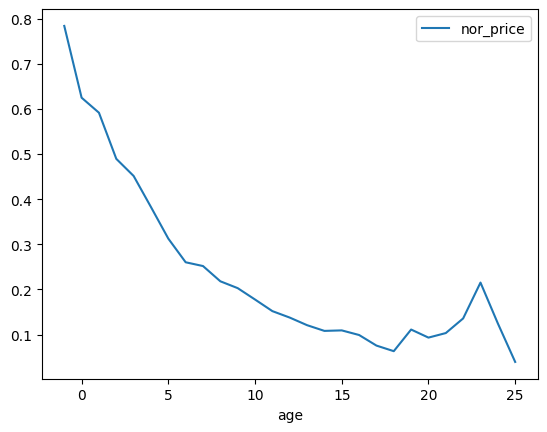

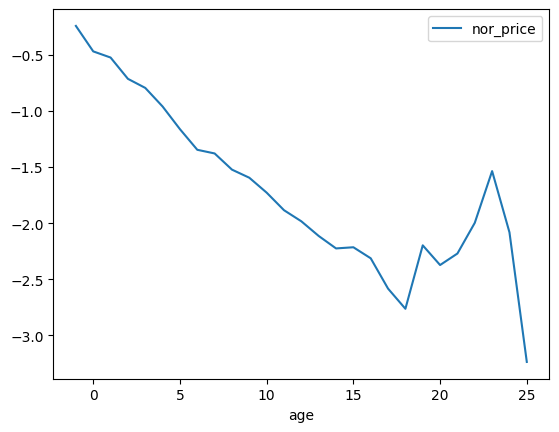

In [34]:
cars_useful_info[["age", "nor_price"]].groupby("age").mean().plot()
cars_useful_info[["age", "nor_price"]].groupby("age").mean().apply(np.log).plot()

<AxesSubplot:xlabel='owners'>

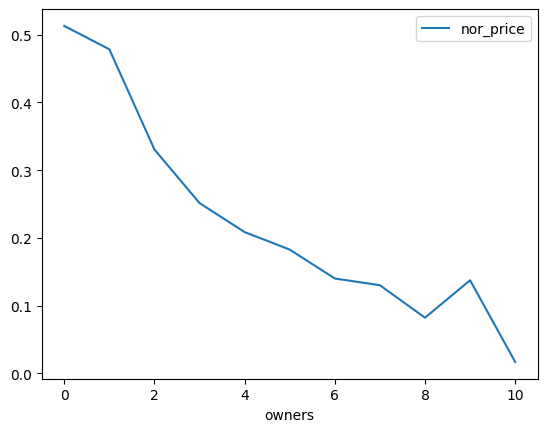

In [35]:
cars_useful_info[["owners", "nor_price"]].groupby("owners").mean().plot()

Tudi zgornja ocena ni presenetljiva, saj je število lastnikov tudi odvisen od starosti(če je imel avto več lastnikov, ima večjo verjetnost, da je tudi stareši). Tudi ta korelacija lahko obrazloši rahel dvig cen pri večjem številu lastnikov.

## Korelacije med podatki
S knjižnico seaborn bomo pogledali in raziskali korelacijo med podatki, ki smo jih prej morda zgrešili.

Spodaj sta prikazana dva heatmap grafa, zanimajo pa nas le podatki, ki imajo najmanjšo ali največjo korelacijo. Očitno so po diagonali matrike enice, saj so podatki sami s seboj v največji moržni korelaciji. Očitna je tudi obratna korelacija med starostjo in letom proizvodnje, saj so tako definirane vrednosti starosti.

#### Zanimivejše odvisnosti in uporaba
- Iz razmerja med porabo v mestu in porabo na avtocesti (0.96) bi lahko eno od vrednosti odstranili
- Razberemo lahko tudi, katere vrednosti najbolj vplivajo na vrednost avtomobila. Če si ogledamo stolpca price in nor_price, lahko opazimo največjo korelacijo med letom in prevoženimi kilometri.
- Opazimo tudi, da četudi je korelacija med starostjo in nesrečami majhna, je korelacija med nesrečami in ceno majhna. Torej očitno število nesreč ne vpliva na ceno kot bi pričakovali.
- Tudi iz drugega korelacijskega grafa opazimo, da sta najbolj vplivna starost in kilometri, ki pa sta seveda tudi med seboj v veliki korelaciji.

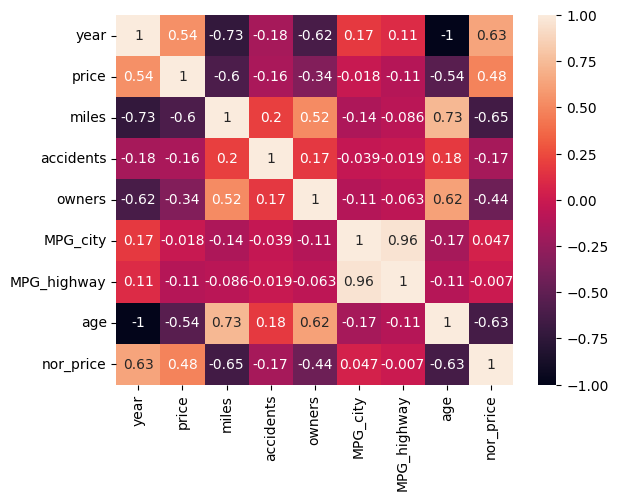

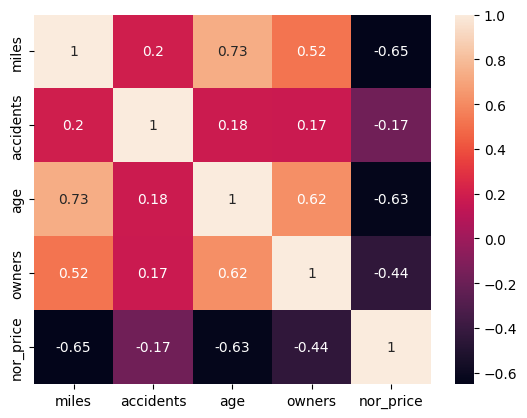

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = cars.corr()
sns.heatmap(corr, annot=True)
plt.show()

corr = cars_useful_info.corr()
sns.heatmap(corr, annot=True)
plt.show()

<AxesSubplot:xlabel='interior', ylabel='price'>

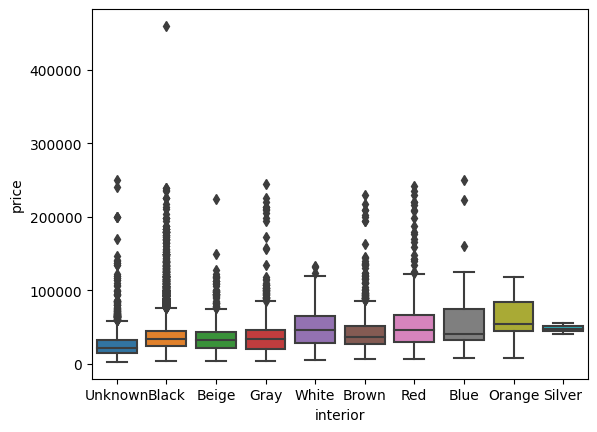

In [42]:
sns.boxplot(x="interior", y="price", data=cars)